# Lab 2 Report
Qinchen Lin

In [354]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.stats import poisson

# Problem 1

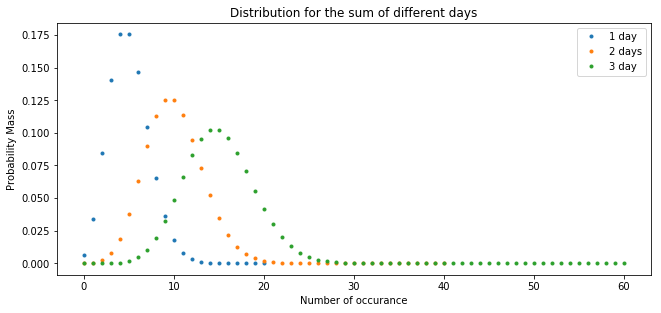

In [355]:
# a
x = 5
y = 8
fig1 = plt.figure(1)
plt.subplots_adjust(top=1, right=1.5)
plt.title("Distribution for the sum of different days")
plt.xlabel("Number of occurance")
plt.ylabel('Probability Mass')
occurance = np.linspace(0,20,21)
p = poisson.pmf(occurance,5)
plt.plot(occurance, p,'.', label = '1 day')

#sum of two days
p2 = np.convolve(p, p)
plt.plot(np.linspace(0, 40, 41), p2,'.', label = '2 days' )

#sum of Three days
p3 = np.convolve(p2, p)
plt.plot(np.linspace(0,60,61),p3,'.', label = '3 day')
plt.legend()
plt.show()

# Discussion
As we can tell from the graph above, the mean (x value for the greatest probability mass) for the distribution shifts
to the right as I sumed for more days. The overall probability mass becomes smaller. And the distribution becomes more like a normal distribution

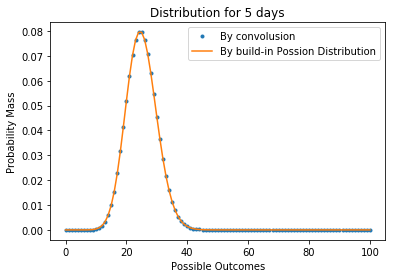

In [356]:
# b
fig2 = plt.figure(2)
i = 0
p5 = p
occurance_5 = np.linspace(0,100,101)
for i in range(4) :
    p5 = np.convolve(p5, p)
plt.plot(occurance_5, p5,'.', label = 'By convolusion')
plt.plot(occurance_5, poisson.pmf(occurance_5, 25), label = 'By build-in Possion Distribution')
plt.title('Distribution for 5 days')
plt.legend(loc = 'upper right')
plt.xlabel('Possible Outcomes')
plt.ylabel('Probability Mass')
plt.show()

# Discussion
As we can tell from the graph above, the ditribution from doing convolution 4 times matches pretty well with the reference Possion distribution (mean is 25). So we can conclude that after 5 days, the sumed probability distribution is also Possion distribution. 

Possion distribution describes "the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last even."(From Wikipedia) 

It make senses that if we sum for more times, the interval and the mean value will be n times greater, becuase the events are independent. Also from a math view, the Possion distribution involves exponential of e. When we keep mutiplying it by itself (in convolution process), the exponent will just be -lamda*n.

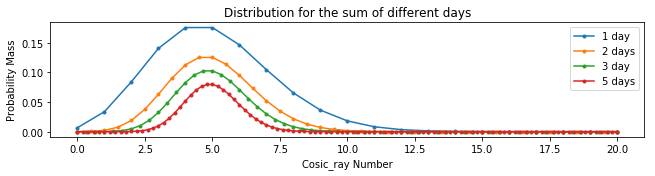

In [357]:
# c
fig3 = plt.figure(3)
plt.subplots_adjust(top=1, right=1.5)
plt.subplot(2,1,1)
plt.title("Distribution for the sum of different days")
plt.xlabel("Cosic_ray Number")
plt.ylabel('Probability Mass')
plt.plot(occurance, p,'.-', label = '1 day')
plt.plot(np.linspace(0, 40, 41)/2, p2,'.-', label = '2 days' )
plt.plot(np.linspace(0,60,61)/3, p3,'.-', label = '3 day')
plt.plot(occurance_5/5, poisson.pmf(occurance_5, 25),'.-', label = '5 days')
plt.legend()
plt.show()

# Discussion
As I kept doing convolution, the mean value for each plot almost stay the same. However, the overall probability mass for summing more days gets smaller, and the distribution becomes more and more likely to a normal distribution, which are the same as in part B. 

It makes sense because the central limit theoem states that "the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger." So the distribution will become more and more normal-like as we keep averaging it.

In [358]:
# d
# I picked N to be 5, Y*N gamma rays = 5*8 = 40
gamma = 40
p_test = stats.poisson.cdf(40, 25)
sigma = (stats.norm.ppf(p_test) - 0) / 1
print('sigma is', sigma)


sigma is 2.8725917394181684


# Problem 2

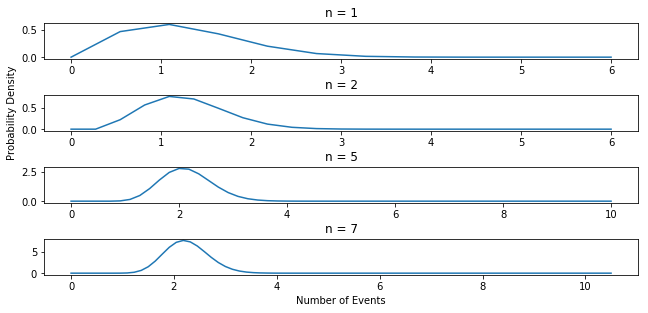

/Users/jeffreylin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


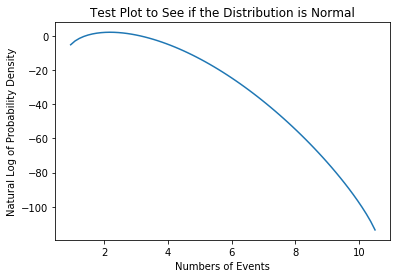

In [364]:
# a
# For this question, I chose a Rayleigh distribution to be my background distribution
# n is the number of times that the original distribution convolves with itself

# original distribution
fig4 = plt.figure(4)
plt.title('Average Probabilidy Distribution for Different n value')
fig4.subplots_adjust(hspace = 1, wspace = 1)
plt.subplots_adjust(top=1, right=1.5)
plt.subplot(4,1,1)
plt.title('n = 1')
x_rayleigh = np.linspace(0,6,12)
pd_rayleigh = stats.rayleigh.pdf(x_rayleigh, loc = 0, scale = 1)
plt.plot(x_rayleigh, pd_rayleigh)

# Do the convolusion with itself
pd_new = np.convolve(pd_rayleigh, pd_rayleigh)
plt.subplot(4, 1, 2)
plt.title('n = 2')
plt.plot(np.linspace(0, 12, 23)/2, pd_new)
plt.ylabel("Probability Density")

# Do the convolusion 4 times with itself
p5 = pd_rayleigh
for i in range(4) :
    p5 = np.convolve(p5, pd_rayleigh)
plt.subplot(4,1,3)
plt.title('n = 5')
plt.plot(np.linspace(0, 30, 12 * 5 -4)/3, p5)

# Do the convolustion 6 times with itself
plt.subplot(4,1,4)
p7 = pd_rayleigh
for i in range(6) :
    p7 = np.convolve(p7, pd_rayleigh)
plt.title('n = 7')
plt.plot(np.linspace(0, 42, 12*7 - 6 )/4, p7)
plt.xlabel('Number of Events')
plt.show()

# test
# This is to test if the log of probability density distribution looks like a parabola
plt.title('Test Plot to See if the Distribution is Normal')
plt.xlabel('Numbers of Events')
plt.ylabel('Natural Log of Probability Density')
plt.plot(np.linspace(0, 42, 12*7 - 6)/4, np.log(p7))
plt.show()

# Discussion
The shape of distribution becomes more and more like normal distribution. As we can see from the test plot (logarithm), after the original distribution was averaged for 7 times, the test plot looks like a parabola. So after about 7 intervals, the distribution becomes Gussian distribution. 

# Problem 3

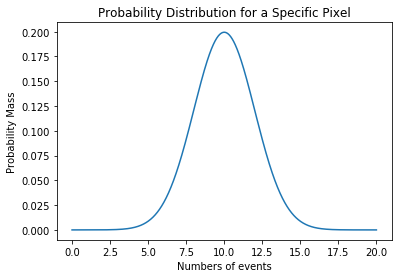

calculated sigma is 5.199999999991312


In [334]:
# Version 1
# a
# The statistic question is : Assuming my signal free data distribution is a Gaussian Distribution,
# What's the probability that I can observe the signal or more signal like for the signal strength of 20.4
# at the specific pixel I'm looking on.
fig5 = plt.figure(5)
X = 10
Y = 20.4
sigma_norm = 2
x_norm = np.linspace(0, 20, 10000)
p_norm = stats.norm.pdf(x_norm, 10, sigma_norm)
plt.title('Probability Distribution for a Specific Pixel')
plt.xlabel('Numbers of events')
plt.ylabel('Probability Mass')
plt.plot(x_norm, p_norm)
plt.show()
p_signal = 1 - stats.norm.cdf(Y, 10, 2)
sigma = stats.norm.ppf(1 - p_signal)
print('calculated sigma is', sigma)

Yes, with this sigma value, I can claim a discovery

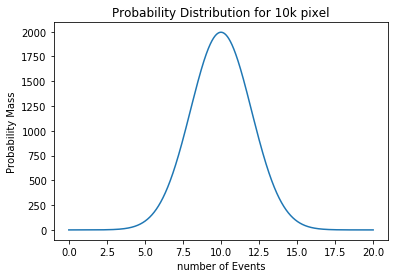

calculated sigma for 10k pixel is 3.091290545976768


In [365]:
# Version 2
# b
# The statistic question is : Assuming my signal free data distribution is a Gaussian Distribution,
# What's the probability that I can observe the signal or more signal like for the signal strength of 20.4
# at the 10k pixel interval that I'm looking on. 
# The main difference is the interval, the version 1 is for one specific pixel while the version 2 is for 10k pixel.
fig6 = plt.figure(6)
plt.title('Probability Distribution for 10k pixel')
plt.xlabel('number of Events')
plt.ylabel('Probability Mass')
p_norm10k = p_norm * 10000
plt.plot(x_norm, p_norm10k)
plt.show()

# c
p_signal10k = (p_signal) * 10000
sigma10k = stats.norm.ppf(1-p_signal10k)
print('calculated sigma for 10k pixel is', sigma10k)


Compared with the sigma in Version 1, the sigma is version 2 for the same signal is below 5 sigma, so I can't claim a discovery

# Problem 4

In [372]:
# a
p_required = 1 - stats.norm.cdf(5)
signal_required = stats.norm.ppf(1 - p_required, 10, 2)
print('signal strength needed for 5 signam = ', signal_required)

# b
signal_required10k = stats.norm.ppf(1-p_required/10000, 10, 2)
print('signal strength needed for 10k pixel =', signal_required10k)

# c
diff = (signal_required10k - signal_required)/2
print('For 10k pixel, the signal should be', diff, 'sigma brighter than the original one')

# d
# here I chose a factor of one billion
signal_requirednew = stats.norm.ppf(1-p_required/1000000000, 10, 2)
print('the signal strength needed for one billion pixel =', signal_requirednew)
diff2 = (signal_requirednew - signal_required)/2
print('For 1 billion pixel, the signal strength need to be' , diff2, 'sigmas brighter than the original one')

signal strength needed for 5 signam =  19.99999999994035
signal strength needed for 10k pixel = 23.101074973783312
For 10k pixel, the signal should be 1.5505374869214812 sigma brighter than the original one
the signal strength needed for one billion pixel = 26.153142008260247
For 1 billion pixel, the signal strength need to be 3.0765710041599483 sigmas brighter than the original one


# Discussion
In part c, we see that the signal need to be 1.6 sigma greater than the original signal, which is relatively low sensitivity penalty. I think one reason is that Y value is significantly high. The second reason could be that the normal distribution is symetric, so the penalty is evenly split. 

Another reason which I'm not sure is that we use the standard normal distribution to get sigma, and the background distribution is normal as well. 

# Extra Credit Part

As I dicussed in the last question above, the shape of distribution will effect the sensitivity penalty. For thoes skew left distribution, if the higher is more signal like, the sensitivity penalty will be high. For thoes skew right distribution, if the lower is more signal like, the sensitivity penalty will be high. I think this is becuase of the weight of probability distribution.

Note that the result above is just my intuitive thinking, more mathmatical proves are needed.